## **Introduction**

**Financial Risk Analysis:**

* The purpose of our project is to develop a predictive classification model to determine loan eligibility.
* This analysis will help financial institution in evaluating whether a loan application should be approved or not which will aim to minimize the risk and maintain financial stability.

## **DMBA Installation**
**This library includes several functions to help evaluate the performance of predictive models. This includes tools for creating confusion matrices, ROC curves,Classification summary.**

In [ ]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 36.8 MB/s eta 0:00:00


## **Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import dmba

from dmba import classificationSummary
from dmba import plotDecisionTree,classificationSummary

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report, mean_squared_error,
precision_score, recall_score,f1_score, confusion_matrix,mean_absolute_error,r2_score,roc_auc_score,roc_curve)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plot
from sklearn.ensemble import GradientBoostingClassifier

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Colab environment detected.


# ***Exploratory Data Analysis***

## **Data Set Reading**

**Loading**

In [ ]:
Fin_data = pd.read_csv("financial_risk_analysis_large.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Fin_data.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,Self-Employed,Widowed,2,Doctorate,Other,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,Self-Employed,Divorced,3,Master,Own,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,Self-Employed,Single,3,Doctorate,Mortgage,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,Self-Employed,Divorced,3,High School,Other,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,Employed,Widowed,4,Master,Own,...,2,690,7856,30087,723,315,114,88,68,0
5,320,67527,18618,20,30,Self-Employed,Widowed,0,Doctorate,Other,...,12,726,7574,21769,853,253,303,213,33,0
6,421,55614,26778,8,58,Unemployed,Widowed,2,Associate,Mortgage,...,38,295,7111,42289,498,646,300,196,107,0
7,766,69614,15391,16,34,Employed,Divorced,3,Associate,Rent,...,26,-130,6223,34655,510,560,459,264,265,0
8,514,72526,19221,29,56,Self-Employed,Single,0,Bachelor,Other,...,35,440,6477,37276,769,451,471,40,165,1
9,630,51364,24451,21,25,Self-Employed,Married,2,High School,Mortgage,...,19,197,5637,9001,1531,478,138,211,123,1


**Check unique values for each object column**

In [ ]:
object_columns = Fin_data.select_dtypes(include='object')
# Check unique values for each object column
for col in object_columns.columns:
    print(f"Unique values in column '{col}':")
    print(Fin_data[col].unique())
    print("\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unique values in column 'EmploymentStatus':
['Self-Employed' 'Employed' 'Unemployed']


Unique values in column 'MaritalStatus':
['Widowed' 'Divorced' 'Single' 'Married']


Unique values in column 'EducationLevel':
['Doctorate' 'Master' 'High School' 'Associate' 'Bachelor']


Unique values in column 'HomeOwnershipStatus':
['Other' 'Own' 'Mortgage' 'Rent']


Unique values in column 'LoanPurpose':
['Education' 'Debt Consolidation' 'Other' 'Home' 'Auto']


Unique values in column 'HealthInsuranceStatus':
['Insured' 'Uninsured']


Unique values in column 'LifeInsuranceStatus':
['Insured' 'Uninsured']


Unique values in column 'CarInsuranceStatus':
['Insured' 'Uninsured']


Unique values in column 'HomeInsuranceStatus':
['Insured' 'Uninsured']


Unique values in column 'EmployerType':
['Self-Employed' 'Private' 'Other' 'Public']




In [ ]:
Fin_data.isnull().sum()


0    51
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Display the predictor's data types**

In [ ]:
Fin_data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
CreditScore,int64
AnnualIncome,int64
LoanAmount,int64
LoanDuration,int64
Age,int64
EmploymentStatus,object
MaritalStatus,object
NumberOfDependents,int64
EducationLevel,object
HomeOwnershipStatus,object


**Print the number of observations and predictors**

In [ ]:
Fin_data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1000000, 51)

**Display the summary metrics**

In [ ]:
Fin_data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,574.559628,59971.227298,20001.643495,15.014402,43.497517,1.999334,499.712597,4.999768e-01,7.005118,4.501799,...,19.500790,499.097705,4999.802337,29990.070722,999.821493,299.567663,399.724339,199.424883,99.458080,0.373169
std,158.774753,15013.989902,5000.662270,8.363599,15.005348,1.415219,199.942646,2.885894e-01,4.318280,2.872479,...,11.541492,299.700808,1999.559754,9994.979331,400.084107,149.851337,199.959738,99.921983,49.931612,0.483647
min,300.000000,-9666.000000,-4900.000000,1.000000,18.000000,0.000000,-539.000000,5.038985e-07,0.000000,0.000000,...,0.000000,-937.000000,-3934.000000,-18396.000000,-1093.000000,-399.000000,-543.000000,-353.000000,-123.000000,0.000000
25%,437.000000,49855.000000,16630.000000,8.000000,30.000000,1.000000,365.000000,2.500684e-01,3.000000,2.000000,...,10.000000,297.000000,3650.000000,23246.000000,730.000000,198.000000,265.000000,132.000000,66.000000,0.000000
50%,574.000000,59973.000000,20006.000000,15.000000,43.000000,2.000000,499.000000,5.003170e-01,7.000000,5.000000,...,20.000000,499.000000,4999.000000,29998.000000,1000.000000,299.000000,400.000000,199.000000,99.000000,0.000000
75%,712.000000,70080.000000,23376.000000,22.000000,56.000000,3.000000,635.000000,7.497447e-01,11.000000,7.000000,...,29.000000,701.000000,6348.000000,36736.000000,1270.000000,401.000000,535.000000,267.000000,133.000000,1.000000
max,849.000000,132414.000000,44921.000000,29.000000,69.000000,4.000000,1504.000000,9.999982e-01,14.000000,9.000000,...,39.000000,2048.000000,14312.000000,79463.000000,2846.000000,1024.000000,1363.000000,670.000000,326.000000,1.000000


**Display predictor variables**

In [ ]:
Fin_data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['CreditScore', 'AnnualIncome', 'LoanAmount', 'LoanDuration', 'Age',
       'EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
       'EducationLevel', 'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'InterestRate', 'PaymentHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance',
       'InvestmentAccountBalance', 'RetirementAccountBalance',
       'EmergencyFundBalance', 'TotalAssets', 'TotalLiabilities', 'NetWorth',
       'LengthOfCreditHistory', 'MortgageBalance', 'RentPayments',
       'AutoLoanBalance', 'PersonalLoanBalance', 'StudentLoanBalance',
       'UtilityBillsPaymentHistory', 'HealthInsuranceStatus',
       'LifeInsuranceStatus', 'CarInsuranceStatus', 'HomeInsuranceStatus',
       'OtherInsurancePolicies', 'EmployerType', 'JobTenure', 'MonthlySavings',
       'AnnualB

**Check if null value is presnet in the dataset**

## **Data Preprocessing or Transforming**

In [ ]:
print(Fin_data[Fin_data.isnull().any(axis=1)])
print(Fin_data.isna().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Empty DataFrame
Columns: [CreditScore, AnnualIncome, LoanAmount, LoanDuration, Age, EmploymentStatus, MaritalStatus, NumberOfDependents, EducationLevel, HomeOwnershipStatus, MonthlyDebtPayments, CreditCardUtilizationRate, NumberOfOpenCreditLines, NumberOfCreditInquiries, DebtToIncomeRatio, BankruptcyHistory, LoanPurpose, PreviousLoanDefaults, InterestRate, PaymentHistory, SavingsAccountBalance, CheckingAccountBalance, InvestmentAccountBalance, RetirementAccountBalance, EmergencyFundBalance, TotalAssets, TotalLiabilities, NetWorth, LengthOfCreditHistory, MortgageBalance, RentPayments, AutoLoanBalance, PersonalLoanBalance, StudentLoanBalance, UtilityBillsPaymentHistory, HealthInsuranceStatus, LifeInsuranceStatus, CarInsuranceStatus, HomeInsuranceStatus, OtherInsurancePolicies, EmployerType, JobTenure, MonthlySavings, AnnualBonuses, AnnualExpenses, MonthlyHousingCosts, MonthlyTransportationCosts, MonthlyFoodCosts, MonthlyHealthcareCosts, MonthlyEntertainmentCosts, LoanApproved]
Index: []


**Handling Categorical Variables**

In [ ]:
Fin_data['EmploymentStatus'] = Fin_data['EmploymentStatus'].astype(pd.CategoricalDtype())
Fin_data['EmploymentStatus'] = Fin_data['EmploymentStatus'].cat.codes

Fin_data['HealthInsuranceStatus'] = Fin_data['HealthInsuranceStatus'].astype(pd.CategoricalDtype())
Fin_data['HealthInsuranceStatus'] = Fin_data['HealthInsuranceStatus'].cat.codes

Fin_data['MaritalStatus'] = Fin_data['MaritalStatus'].astype(pd.CategoricalDtype())
Fin_data['MaritalStatus'] = Fin_data['MaritalStatus'].cat.codes

Fin_data['EducationLevel'] = Fin_data['EducationLevel'].astype(pd.CategoricalDtype())
Fin_data['EducationLevel'] = Fin_data['EducationLevel'].cat.codes

Fin_data['HomeOwnershipStatus'] = Fin_data['HomeOwnershipStatus'].astype(pd.CategoricalDtype())
Fin_data['HomeOwnershipStatus'] = Fin_data['HomeOwnershipStatus'].cat.codes

Fin_data['LoanPurpose'] = Fin_data['LoanPurpose'].astype(pd.CategoricalDtype())
Fin_data['LoanPurpose'] = Fin_data['LoanPurpose'].cat.codes

Fin_data['LifeInsuranceStatus'] = Fin_data['LifeInsuranceStatus'].astype(pd.CategoricalDtype())
Fin_data['LifeInsuranceStatus'] = Fin_data['LifeInsuranceStatus'].cat.codes

Fin_data['CarInsuranceStatus'] = Fin_data['CarInsuranceStatus'].astype(pd.CategoricalDtype())
Fin_data['CarInsuranceStatus'] = Fin_data['CarInsuranceStatus'].cat.codes

Fin_data['HomeInsuranceStatus'] = Fin_data['HomeInsuranceStatus'].astype(pd.CategoricalDtype())
Fin_data['HomeInsuranceStatus'] = Fin_data['HomeInsuranceStatus'].cat.codes

Fin_data['EmployerType'] = Fin_data['EmployerType'].astype(pd.CategoricalDtype())
Fin_data['EmployerType'] = Fin_data['EmployerType'].cat.codes



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
Fin_data.head(15)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,1,3,2,2,1,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,1,0,3,4,2,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,1,2,3,2,0,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,1,0,3,3,1,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,0,3,4,4,2,...,2,690,7856,30087,723,315,114,88,68,0
5,320,67527,18618,20,30,1,3,0,2,1,...,12,726,7574,21769,853,253,303,213,33,0
6,421,55614,26778,8,58,2,3,2,0,0,...,38,295,7111,42289,498,646,300,196,107,0
7,766,69614,15391,16,34,0,0,3,0,3,...,26,-130,6223,34655,510,560,459,264,265,0
8,514,72526,19221,29,56,1,2,0,1,1,...,35,440,6477,37276,769,451,471,40,165,1
9,630,51364,24451,21,25,1,1,2,3,0,...,19,197,5637,9001,1531,478,138,211,123,1


In [ ]:
Fin_data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
CreditScore,int64
AnnualIncome,int64
LoanAmount,int64
LoanDuration,int64
Age,int64
EmploymentStatus,int8
MaritalStatus,int8
NumberOfDependents,int64
EducationLevel,int8
HomeOwnershipStatus,int8


## **Check for Multicollinearity**

In [28]:
corr_matrix = Fin_data.corr()
corr_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
CreditScore,1.000000,-0.000073,0.000173,0.000890,0.000747,0.000284,0.001617,0.001156,-0.000950,0.000796,...,0.000364,-0.002186,-0.000546,0.000679,1.274728e-03,-0.001408,0.000181,0.000274,-0.000380,0.486384
AnnualIncome,-0.000073,1.000000,0.001321,-0.001164,0.001681,-0.000440,0.001591,-0.000778,-0.001158,0.000207,...,-0.000701,-0.000669,-0.000445,-0.001263,3.157086e-04,0.000941,0.000011,0.000686,-0.001696,0.043875
LoanAmount,0.000173,0.001321,1.000000,0.002114,0.001310,-0.000342,-0.000735,-0.000221,0.000121,-0.000769,...,0.001180,-0.000804,-0.000720,0.000628,-3.532782e-04,0.001123,-0.000037,0.000479,0.000044,0.001029
LoanDuration,0.000890,-0.001164,0.002114,1.000000,0.002273,0.000151,0.000404,-0.001137,0.000752,0.001251,...,0.000785,0.000869,0.001042,-0.001068,-1.822855e-03,-0.002060,-0.001157,0.000585,0.000639,-0.000022
Age,0.000747,0.001681,0.001310,0.002273,1.000000,-0.000250,-0.000454,0.000873,-0.001193,0.001251,...,-0.000671,0.000071,-0.001027,0.000709,-8.806643e-04,0.000318,0.000864,-0.000007,0.000147,0.000021
EmploymentStatus,0.000284,-0.000440,-0.000342,0.000151,-0.000250,1.000000,0.001646,0.000207,0.001199,-0.001286,...,-0.001888,-0.000946,-0.000262,-0.001923,6.620435e-04,0.000279,0.000787,0.001839,0.000226,-0.000213
MaritalStatus,0.001617,0.001591,-0.000735,0.000404,-0.000454,0.001646,1.000000,0.001243,-0.000376,-0.000107,...,-0.001304,0.000730,0.001304,0.000567,7.940521e-04,0.000798,-0.000641,-0.000616,-0.000919,0.000874
NumberOfDependents,0.001156,-0.000778,-0.000221,-0.001137,0.000873,0.000207,0.001243,1.000000,-0.000226,-0.000075,...,0.000310,-0.000284,0.000064,0.000527,-2.076556e-03,0.000217,-0.000321,0.000141,-0.000128,0.000316
EducationLevel,-0.000950,-0.001158,0.000121,0.000752,-0.001193,0.001199,-0.000376,-0.000226,1.000000,-0.001032,...,0.000013,-0.002197,-0.001166,0.000659,-5.107880e-04,0.000891,-0.001304,0.000216,0.000263,0.000958
HomeOwnershipStatus,0.000796,0.000207,-0.000769,0.001251,0.001251,-0.001286,-0.000107,-0.000075,-0.001032,1.000000,...,-0.000948,0.001328,-0.000767,0.000804,1.558321e-03,0.000435,-0.000135,-0.000326,-0.002318,0.001837


## **Display correlation Matrix Heatmap**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


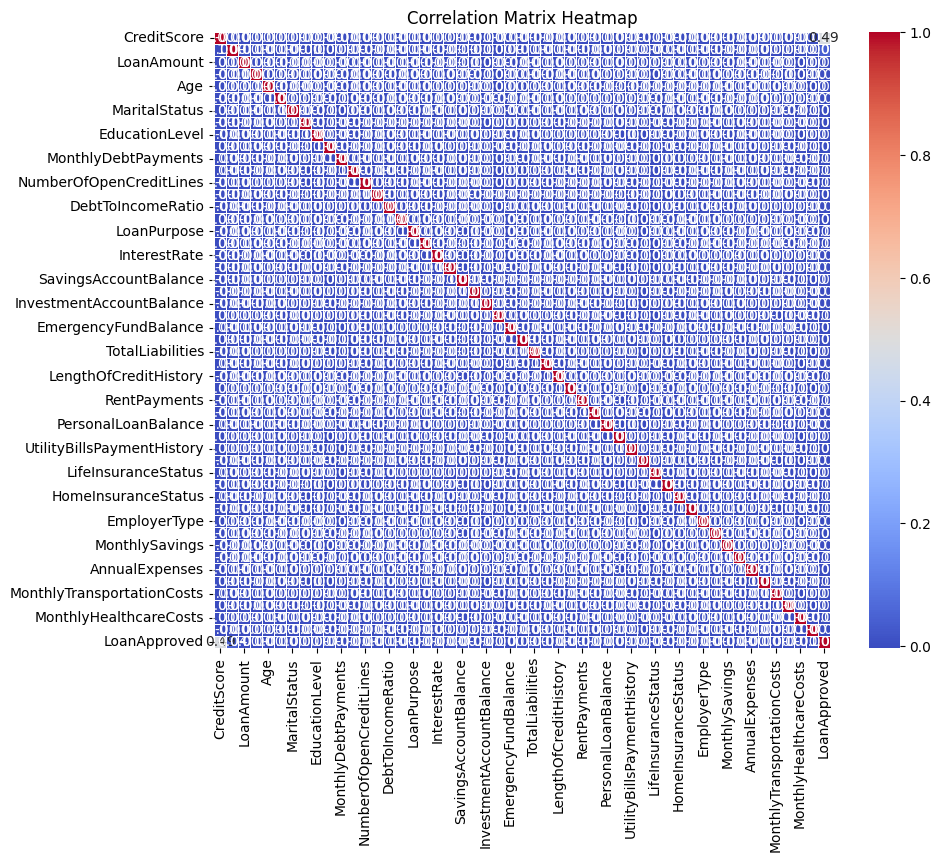

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## **Finding Most Skewed values and Cleansing the Data**

To improve the performance of the model, we need to analyze the skewness of data. Identifying skewness helps us to decide if transformation is needed to normalize the data


*   A positively skewed distribution may indicate that most data points are concentrated on the left, with a few high-value outliers.

*   A negatively skewed distribution may indicate that most values are high, with a few low-value outliers.



**Skewed Data**

In [ ]:
skewness = Fin_data.skew()
skewness_Fin_data = pd.DataFrame({
    'Skewness': skewness
})

skewness_Fin_data_sorted = skewness_Fin_data.sort_values(by='Skewness', ascending=False)

print(skewness_Fin_data_sorted)
# BankruptcyHistory, PreviousLoanDefaults shows significant right skewness, suggesting it might need transformation (like log transformation)
# if we are planning to use it in statistical modeling that assumes normality.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                            Skewness
BankruptcyHistory           4.135683
PreviousLoanDefaults        2.661938
LoanApproved                0.524479
PersonalLoanBalance         0.007335
RentPayments                0.005305
MonthlyTransportationCosts  0.005277
CheckingAccountBalance      0.004374
MonthlyEntertainmentCosts   0.003879
MonthlyDebtPayments         0.003584
AutoLoanBalance             0.003305
MortgageBalance             0.002539
MonthlyFoodCosts            0.002024
MonthlyHealthcareCosts      0.001986
AnnualBonuses               0.001855
OtherInsurancePolicies      0.001486
Age                         0.001279
CreditScore                 0.001275
MaritalStatus               0.001203
NetWorth                    0.001059
TotalAssets                 0.001009
EmployerType                0.000812
MonthlySavings              0.000609
LifeInsuranceStatus         0.000432
TotalLiabilities            0.000419
UtilityBillsPaymentHistory  0.000352
InvestmentAccountBalance    0.000310
A

### **Data Skewness Handling**

**Remove Outliers from the most skewed predictors/features using Interquartile Range (IQR)**

In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from both columns
Fin_data_no_outliers = remove_outliers_iqr(Fin_data, 'BankruptcyHistory')
Fin_data_no_outliers = remove_outliers_iqr(Fin_data_no_outliers, 'PreviousLoanDefaults')

# Check the shape of the original and the new DataFrame
print(f"Original shape: {Fin_data.shape}")
print(f"New shape after removing outliers: {Fin_data_no_outliers.shape}")

# Optional: Verify that outliers are removed
print("\nSummary of remaining data:")
print(Fin_data_no_outliers[['BankruptcyHistory', 'PreviousLoanDefaults']].describe())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original shape: (1000000, 51)
New shape after removing outliers: (854910, 51)

Summary of remaining data:
       BankruptcyHistory  PreviousLoanDefaults
count           854910.0              854910.0
mean                 0.0                   0.0
std                  0.0                   0.0
min                  0.0                   0.0
25%                  0.0                   0.0
50%                  0.0                   0.0
75%                  0.0                   0.0
max                  0.0                   0.0


### **Checking skewness after removing outliers from two predictors**


*   BankruptcyHistory
*   PreviousLoanDefaults



In [ ]:
# Calculate skewness
finData_df = pd.DataFrame(Fin_data_no_outliers)
skewness = finData_df.skew()
skewness_Fin_data = pd.DataFrame({
    'Skewness': skewness
})

skewness_Fin_data_sorted = skewness_Fin_data.sort_values(by='Skewness', ascending=False)

print(skewness_Fin_data_sorted)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                            Skewness
LoanApproved                0.524680
PersonalLoanBalance         0.009087
MonthlyTransportationCosts  0.006221
RentPayments                0.004944
MonthlyDebtPayments         0.004723
MonthlyFoodCosts            0.004664
MonthlyHealthcareCosts      0.003567
AnnualBonuses               0.002870
AutoLoanBalance             0.002699
MonthlySavings              0.002524
CheckingAccountBalance      0.002506
MonthlyEntertainmentCosts   0.002444
Age                         0.001823
SavingsAccountBalance       0.001629
CreditScore                 0.001584
TotalAssets                 0.001570
MaritalStatus               0.001483
AnnualIncome                0.001449
MortgageBalance             0.001391
InvestmentAccountBalance    0.001271
OtherInsurancePolicies      0.001241
LifeInsuranceStatus         0.000898
NetWorth                    0.000451
EducationLevel              0.000326
EmployerType                0.000305
LoanPurpose                 0.000206
E

In [ ]:
print(finData_df.shape)

(854910, 51)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
finData_df[0:50]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CreditScore,AnnualIncome,LoanAmount,LoanDuration,Age,EmploymentStatus,MaritalStatus,NumberOfDependents,EducationLevel,HomeOwnershipStatus,...,JobTenure,MonthlySavings,AnnualBonuses,AnnualExpenses,MonthlyHousingCosts,MonthlyTransportationCosts,MonthlyFoodCosts,MonthlyHealthcareCosts,MonthlyEntertainmentCosts,LoanApproved
0,402,63295,18830,13,29,1,3,2,2,1,...,24,378,3741,40058,977,412,399,136,124,0
1,735,55936,23729,1,42,1,0,3,4,2,...,10,575,4115,16745,695,206,898,252,131,0
2,570,62547,19660,7,54,1,2,3,2,0,...,16,691,4105,23273,627,266,392,73,36,0
3,406,46129,21674,23,25,1,0,3,3,1,...,6,452,4559,42163,397,307,250,378,-32,0
4,371,57725,12189,26,42,0,3,4,4,2,...,2,690,7856,30087,723,315,114,88,68,0
5,320,67527,18618,20,30,1,3,0,2,1,...,12,726,7574,21769,853,253,303,213,33,0
7,766,69614,15391,16,34,0,0,3,0,3,...,26,-130,6223,34655,510,560,459,264,265,0
9,630,51364,24451,21,25,1,1,2,3,0,...,19,197,5637,9001,1531,478,138,211,123,1
11,387,79168,22949,3,26,1,3,1,2,3,...,14,454,6740,38666,1172,620,555,37,82,0
12,672,33438,28278,11,34,1,3,2,2,3,...,20,288,6002,31670,970,142,555,91,179,1


In [ ]:
finData_df.isna().sum()
nan_counts = finData_df.isna().sum()
print(nan_counts[nan_counts > 0])

Series([], dtype: int64)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Data Visualization** ()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


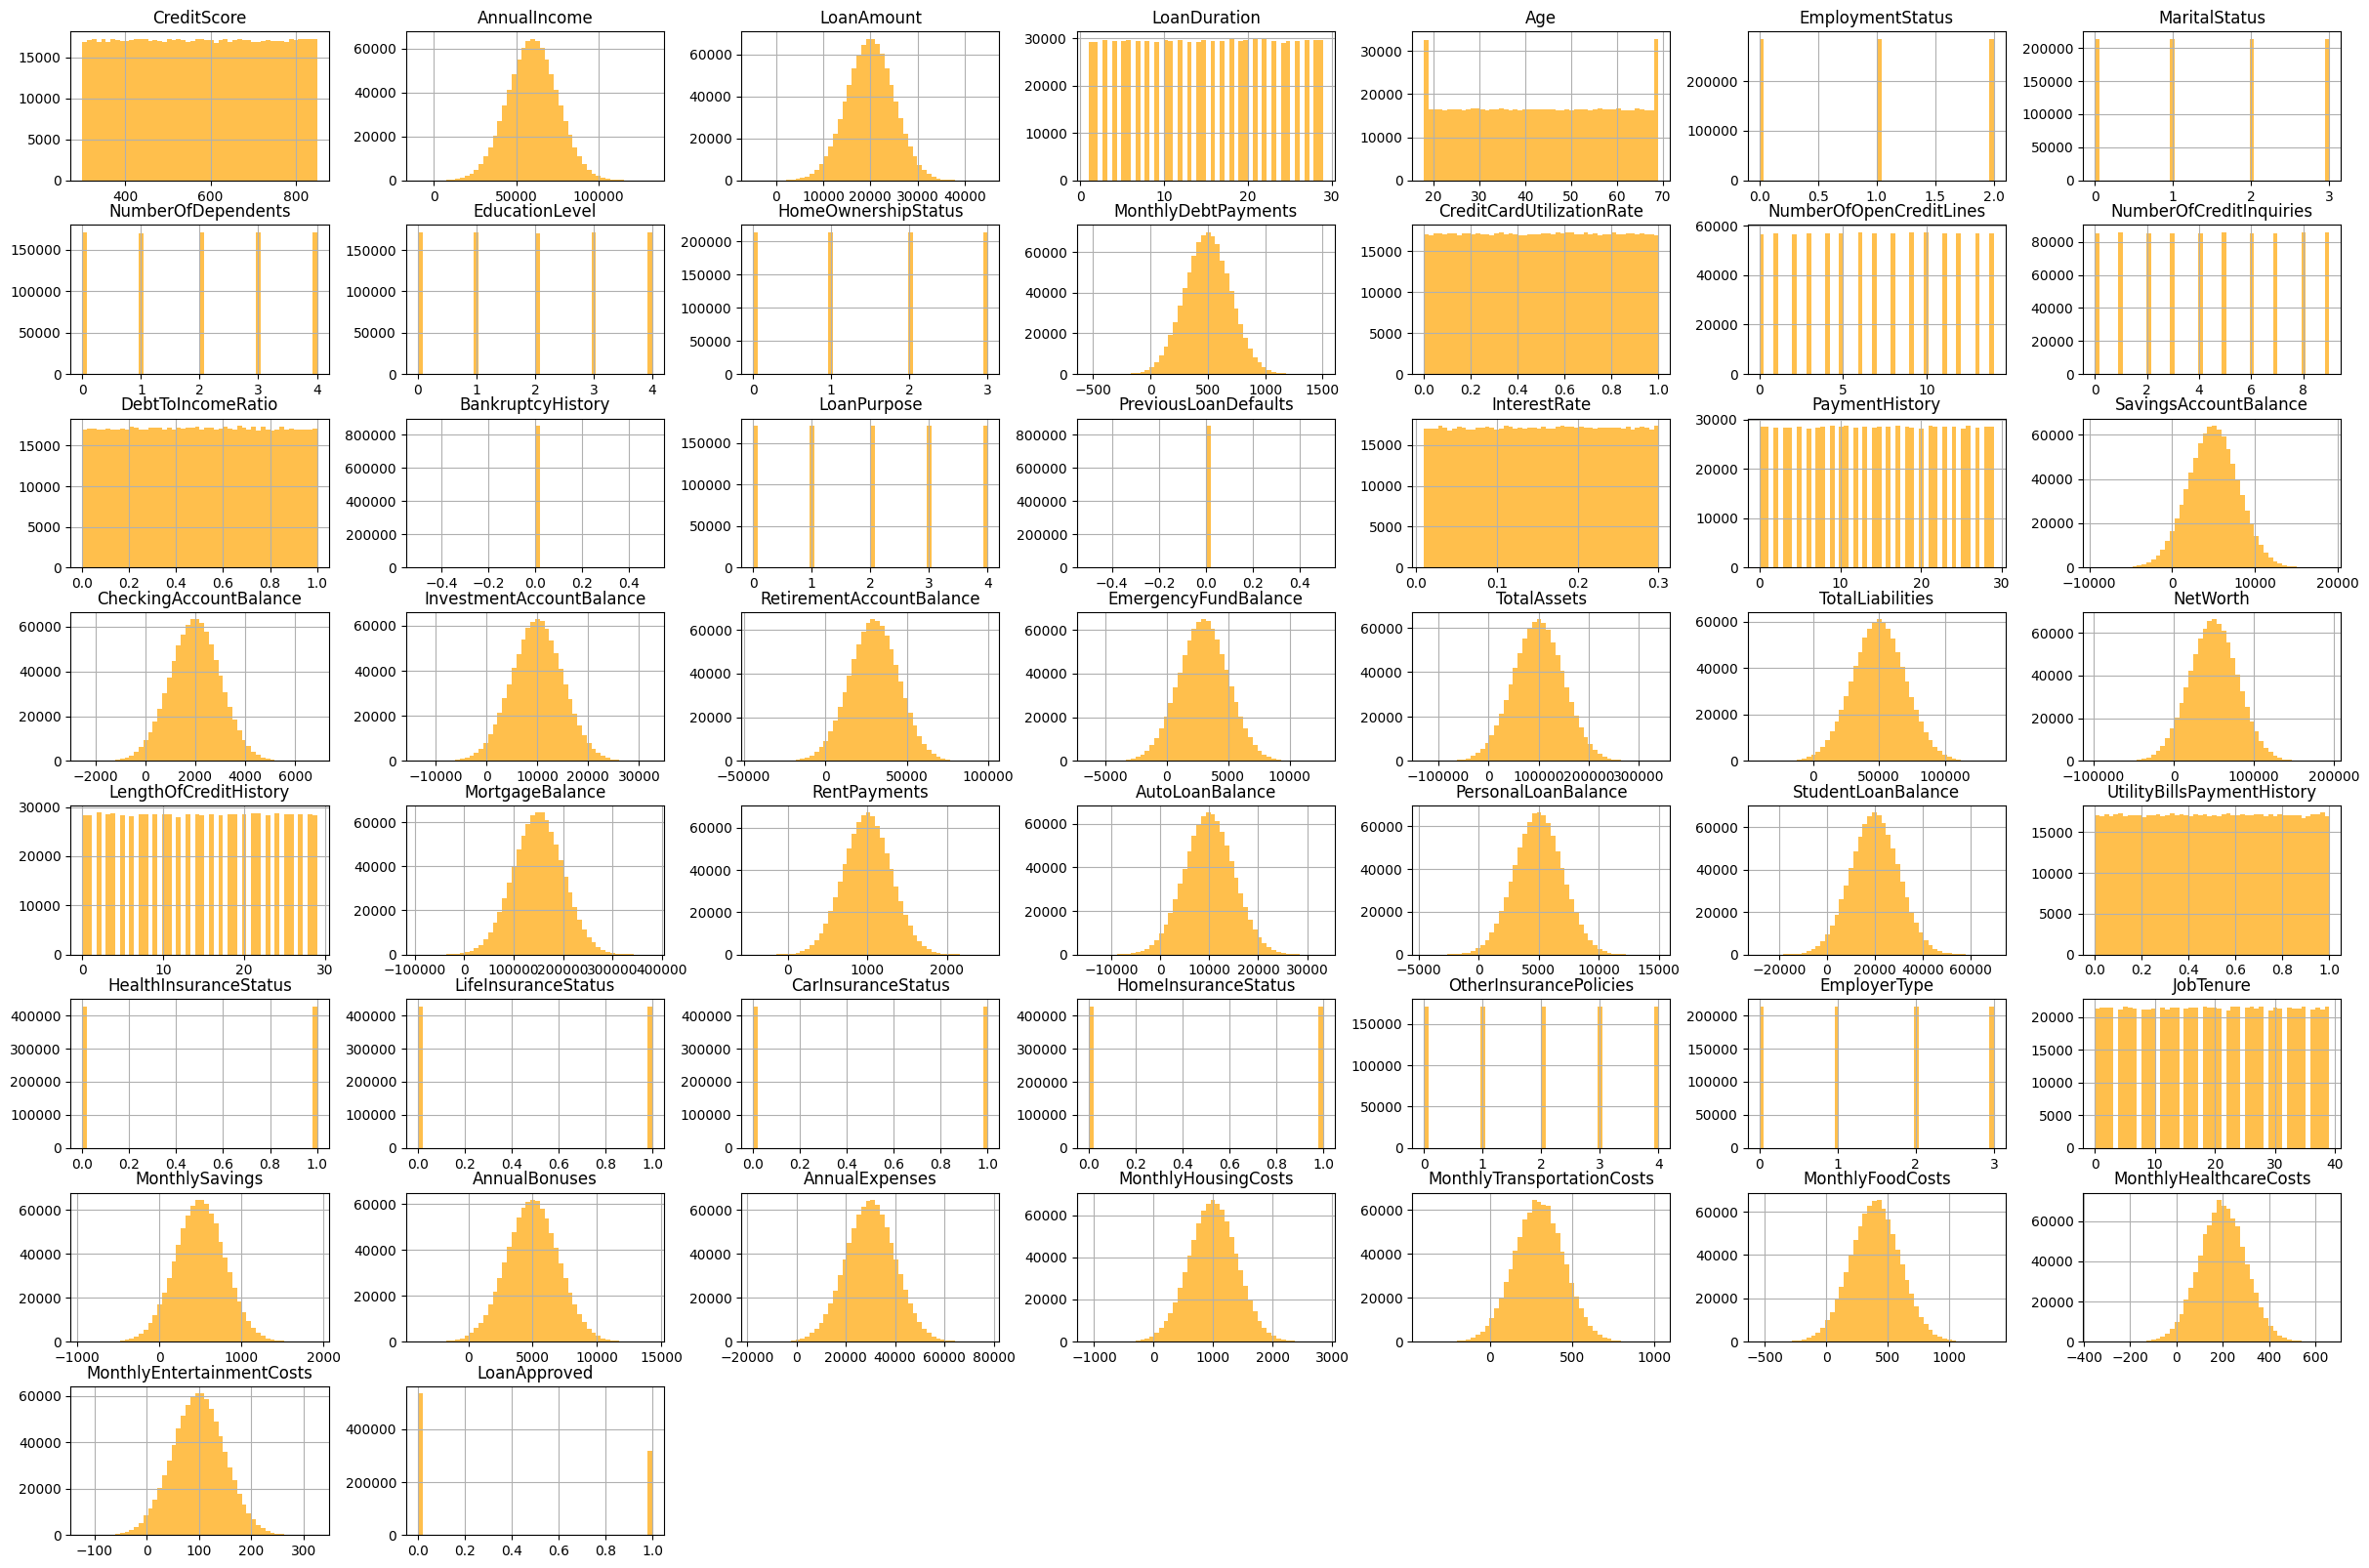

In [32]:
# Simple histogram for the 'CreditScore' variable
finData_df.hist(bins=50, figsize=(30, 20), color='orange', alpha=0.7)
plt.title('Histogram of Financial Data')
plt.show()

## **Data Standardization and Normalization** ()

**Variable selection for model and prediction**

In [33]:
# The predictors are considered as risk factors to classify the dependent variable loan approval.

X = finData_df.drop(columns='LoanApproved')
y = finData_df['LoanApproved']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Data Scaling Or Normalizing**

In [34]:
scaled = StandardScaler()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Data Partition**

In [35]:
trainX,testX,trainY,testY = train_test_split(X,y,test_size=0.4,random_state=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
trainX = scaled.fit_transform(trainX)
testX = scaled.transform(testX)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Data Accuaracy And Rules before Cleaning the data**

## **Decision Tree Classifier** ()

**Running Decision Tree on entire dataset without parameter tuning**

In [ ]:
# rf = DecisionTreeClassifier()
# rf.fit(trainX, trainY)
# print("Prediction and Evaluation")

# print("Confusion Matrix")
# classificationSummary(trainY, rf.predict(trainY))
# classificationSummary(testY, rf.predict(testY))

# print("RF Score (DecisionTreeClassifier score)")

# print("RF score for trainign set")
# rf.score(trainY, rf.predict(trainX))
# print("RF score for test set")
# rf.score(testY, rf.predict(testX))

In [ ]:
from sklearn.tree import export_text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fin_data_tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=fin_data_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(trainX, trainY)
best_params = grid_search.best_params_
print("Best parameters found:", best_params)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best parameters found: {'max_depth': 2, 'min_samples_split': 2}


In [ ]:
# Train the best model
best_model = grid_search.best_estimator_
y_pred_tree = best_model.predict(testX)

Class_report = classification_report(testY, y_pred_tree)
accuracy = accuracy_score(testY,y_pred_tree)
print(f"Classification Report for Decision Tree  is:\n\n {Class_report}\n")
print(f"Accuracy Score for Decision Tree with all independent variables  is : \n\n {accuracy}\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Report for Decision Tree  is:

               precision    recall  f1-score   support

           0       1.00      0.60      0.75    214260
           1       0.60      1.00      0.75    127704

    accuracy                           0.75    341964
   macro avg       0.80      0.80      0.75    341964
weighted avg       0.85      0.75      0.75    341964


Accuracy Score for Decision Tree with all independent variables  is : 

 0.7517370249499947



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


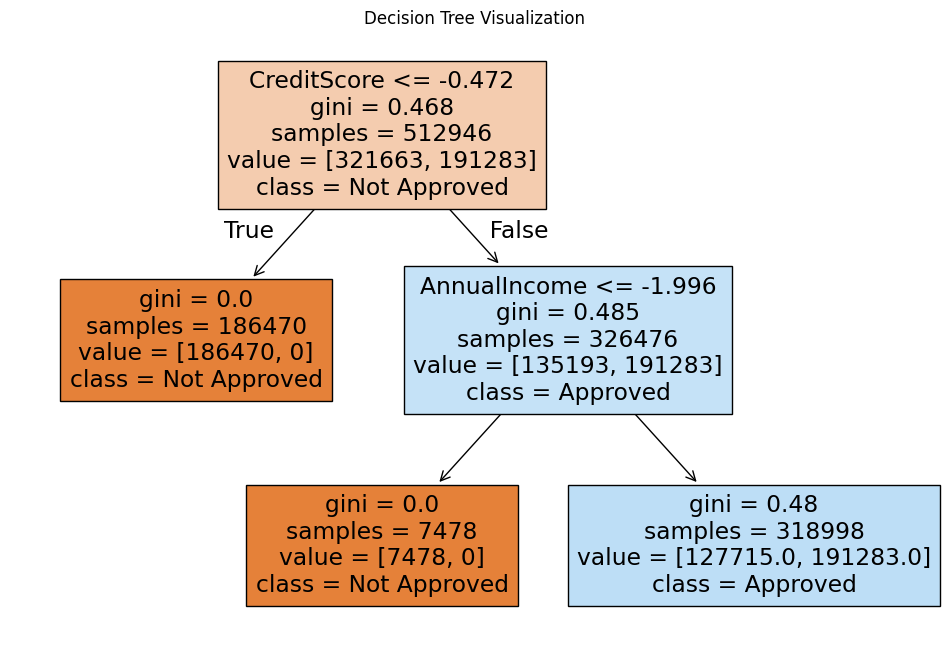

In [ ]:
plot.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Not Approved', 'Approved'])
plot.title('Decision Tree Visualization')
plot.show()


In [ ]:
classificationSummary(trainY, best_model.predict(trainX))
classificationSummary(testY, y_pred_tree)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confusion Matrix (Accuracy 0.7510)

       Prediction
Actual      0      1
     0 193948 127715
     1      0 191283
Confusion Matrix (Accuracy 0.7517)

       Prediction
Actual      0      1
     0 129363  84897
     1      0 127704


In [ ]:
rules = export_text(best_model, feature_names=X.columns)
print("\nClassification Rules:")
print(rules)


Classification Rules:
|--- CreditScore <= -0.47
|   |--- class: 0
|--- CreditScore >  -0.47
|   |--- AnnualIncome <= -2.00
|   |   |--- class: 0
|   |--- AnnualIncome >  -2.00
|   |   |--- class: 1



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Random forest Model for 50 Predictors**

### **Running Random Forest on entire dataset without parameter tuning**

In [ ]:
# rf = RandomForestClassifier()
# rf.fit(trainX, trainY)
# print("Prediction and Evaluation")

# print("Confusion Matrix")
# classificationSummary(trainY, rf.predict(trainY))
# classificationSummary(testY, rf.predict(testY))

# print("RF Score (Random Forest Score)")

# print("RF score for trainign set")
# rf.score(trainY, rf.predict(trainX))
# print("RF score for test set")
# rf.score(testY, rf.predict(testX))

In [77]:
n_estimators_options = [10, 30, 100]
max_depth_options = [5,10,30]
scoreListRF =[]
# Set early stopping condition
desired_accuracy = 0.90  # Stop tuning if this accuracy is reached
early_stopping = False

# Initialize lists to store results
results = []

# Iterate through hyperparameter combinations
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        # Initialize the RandomForest model with current hyperparameters
        RFclassifier = RandomForestClassifier(
            n_estimatrs=n_estimators,
            max_depth=max_depth,
            max_features='sqrt',  # Column sampling (using sqrt of features)
            bootstrap=True,       # Row sampling (bagging)
            random_state=5
        )

        # Perform cross-validation with cv=5
        cv_scores = cross_val_score(RFclassifier, trainX, trainY, cv=5)
        accuracy = cv_scores.mean()  # Average accuracy across 5 folds
        scoreListRF.append(accuracy)

        # Store the results
        result = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'accuracy': accuracy
        }
        results.append(result)

        # Print the current combination and accuracy
        print(f'n_estimators={n_estimators}, max_depth={max_depth}, accuracy={accuracy:.4f}')

        # Early stopping if desired accuracy is reached
        if accuracy >= desired_accuracy:
            print(f"Early stopping triggered: Desired accuracy of {desired_accuracy} reached.")
            early_stopping = True
            break
    if early_stopping:
        break

# Sort results by accuracy
results_sorted = sorted(results, key=lambda x: x['accuracy'], reverse=True)

# Display the best model
best_model = results_sorted[0]
print(f'Best model: {best_model}')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


n_estimators=10, max_depth=5, accuracy=0.6842
n_estimators=10, max_depth=10, accuracy=0.7340
n_estimators=10, max_depth=30, accuracy=0.7302
n_estimators=30, max_depth=5, accuracy=0.6672
n_estimators=30, max_depth=10, accuracy=0.7494
n_estimators=30, max_depth=30, accuracy=0.7431
n_estimators=100, max_depth=5, accuracy=0.6278
n_estimators=100, max_depth=10, accuracy=0.7510
n_estimators=100, max_depth=30, accuracy=0.7502
Best model: {'n_estimators': 100, 'max_depth': 10, 'accuracy': 0.7509620924879682}


In [79]:
rfClassifier_model = RandomForestClassifier(
            n_estimators=best_model['n_estimators'],
            max_depth=best_model['max_depth'],
            random_state=5
        )

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
rfClassifier_model.fit(trainX,trainY)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(max_depth=10, random_state=5)

In [90]:
predY_rf = rfClassifier_model.predict(testX)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
print("Prediction and Evaluation")

classificationSummary(trainY, rfClassifier_model.predict(trainX))
classificationSummary(testY, predY_rf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Prediction and Evaluation
Confusion Matrix (Accuracy 0.7511)

       Prediction
Actual      0      1
     0 193994 127669
     1      1 191282
Confusion Matrix (Accuracy 0.7517)

       Prediction
Actual      0      1
     0 129366  84894
     1      6 127698


In [93]:
Class_report = classification_report(testY,predY_rf)
accuracy = accuracy_score(testY,predY_rf)
print(f"Classification Report for logit  is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit with all independent variables  is : \n\n {accuracy}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Report for logit  is:

               precision    recall  f1-score   support

           0       1.00      0.60      0.75    214260
           1       0.60      1.00      0.75    127704

    accuracy                           0.75    341964
   macro avg       0.80      0.80      0.75    341964
weighted avg       0.85      0.75      0.75    341964


Accuracy Score for logit with all independent variables  is : 

 0.7517282520967119



## **Random forest Model for Feature importance or Dimension Reduction**

In [99]:
X = finData_df.drop(columns='LoanApproved')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                       feature  importance
0                  CreditScore    0.895973
1                 AnnualIncome    0.081929
47            MonthlyFoodCosts    0.000816
25                 TotalAssets    0.000786
23    RetirementAccountBalance    0.000757
11   CreditCardUtilizationRate    0.000753
26            TotalLiabilities    0.000745
43               AnnualBonuses    0.000739
24        EmergencyFundBalance    0.000736
29             MortgageBalance    0.000722
27                    NetWorth    0.000719
33          StudentLoanBalance    0.000719
21      CheckingAccountBalance    0.000705
18                InterestRate    0.000705
34  UtilityBillsPaymentHistory    0.000703
10         MonthlyDebtPayments    0.000681
44              AnnualExpenses    0.000674
32         PersonalLoanBalance    0.000673
31             AutoLoanBalance    0.000669
45         MonthlyHousingCosts    0.000660
14           DebtToIncomeRatio    0.000650
46  MonthlyTransportationCosts    0.000638
2          

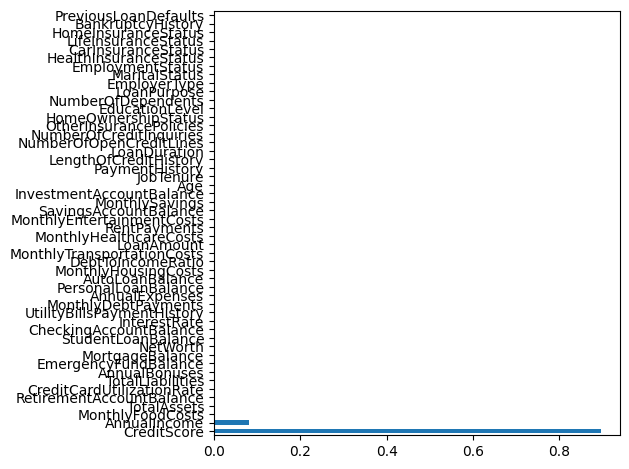

In [100]:
# Reduce the data dimension, if necessary .
# Dimension reduction can involve operations such as eliminating unneeded variables.

importances = rfClassifier_model.feature_importances_ # variable importance
df = pd.DataFrame({'feature': X.columns, 'importance': importances})
df = df.sort_values('importance',ascending=False)
print(df)

ax = df.plot(kind='barh', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [101]:
imp_feature_X = finData_df.drop(columns=['LoanApproved', 'PreviousLoanDefaults', 'BankruptcyHistory'])
y = finData_df['LoanApproved']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
scaled_after = MinMaxScaler()
imp_feature_X_Scaled = scaled_after.fit_transform(imp_feature_X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
train_x,test_x,train_y,test_y = train_test_split(imp_feature_X_Scaled,y, test_size=0.4,random_state=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Performance of RandomForestClassifier AFter Dimension Reduction**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


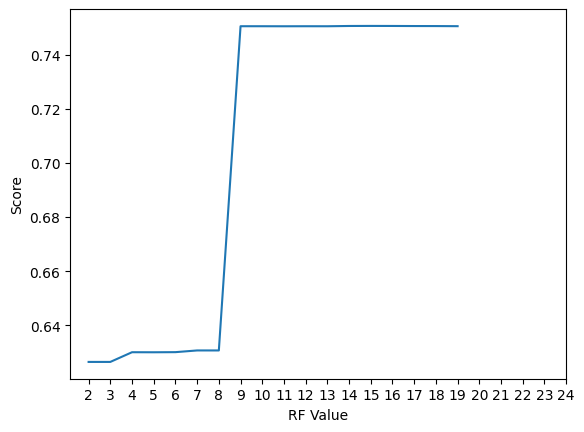

Random Forest Accuracy:  75.06%


In [110]:
scoreListRF_After = []
for i in range(2,20):
  RFclassifier_after = RandomForestClassifier(n_estimators = 3, random_state = 3, max_leaf_nodes=i)
  RFclassifier_after.fit(train_x, train_y)
  scoreListRF_After.append(RFclassifier_after.score(test_x, test_y))
plt.plot(range(2,20), scoreListRF_After)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF_After)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))


In [105]:
RFclassifier_after = RandomForestClassifier(n_estimators = 3, random_state = 3, max_leaf_nodes=i)
RFclassifier_after.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(max_leaf_nodes=14, n_estimators=3, random_state=3)

In [106]:
y_pred = RFclassifier_after.predict(test_x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [107]:
# Classification Metrics (with Confusion Matrix)
conf_matrix = confusion_matrix(test_y,y_pred)
Class_report = classification_report(test_y,y_pred)
accuracy = accuracy_score(test_y,y_pred)
print(f"Confustion Matrix for Random Forest  is: \n\n {conf_matrix}\n")
print(f"Classification Report for Random Forest  is:\n\n {Class_report}\n")
print(f"Accuracy Score for Random Forest with all independent variables  is : \n\n {accuracy}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confustion Matrix for Random Forest  is: 

 [[130169  84091]
 [  1217 126487]]

Classification Report for Random Forest  is:

               precision    recall  f1-score   support

           0       0.99      0.61      0.75    214260
           1       0.60      0.99      0.75    127704

    accuracy                           0.75    341964
   macro avg       0.80      0.80      0.75    341964
weighted avg       0.85      0.75      0.75    341964


Accuracy Score for Random Forest with all independent variables  is : 

 0.7505351440502509



## **Visualization ROC Curve for Classification**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


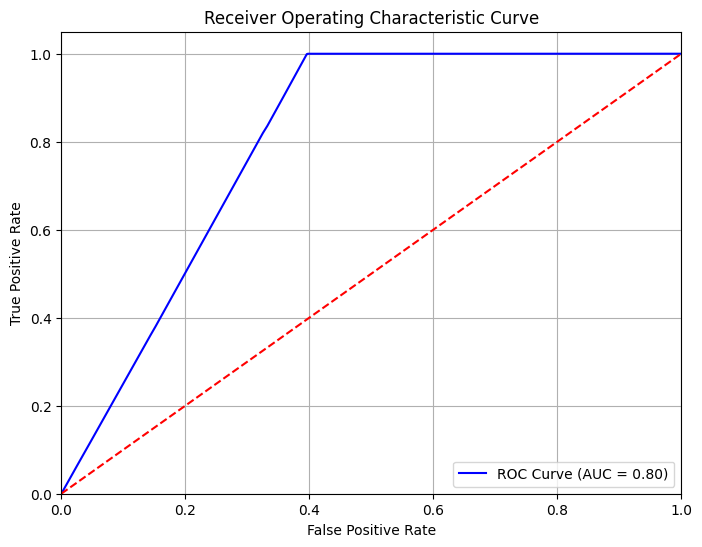

In [108]:
# ROC Curve for Classification

y_prob_class = RFclassifier_after.predict_proba(test_x)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y, y_prob_class)
roc_auc = roc_auc_score(test_y, y_prob_class)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# Interpretation:
# AUC Value: The Area Under the Curve (AUC) is 0.80, which is quite good. AUC values range from 0 to 1, with higher values indicating better model performance.
# An AUC of 0.80 means your model has a 80% chance of correctly distinguishing between positive and negative classes.

# **Principle Componenet Analysis**

## **Elbow Curve For Number of Components to be used**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of PCs to capture at least 95% variance: 47
Total proportion of variance captured: 0.969409544697034


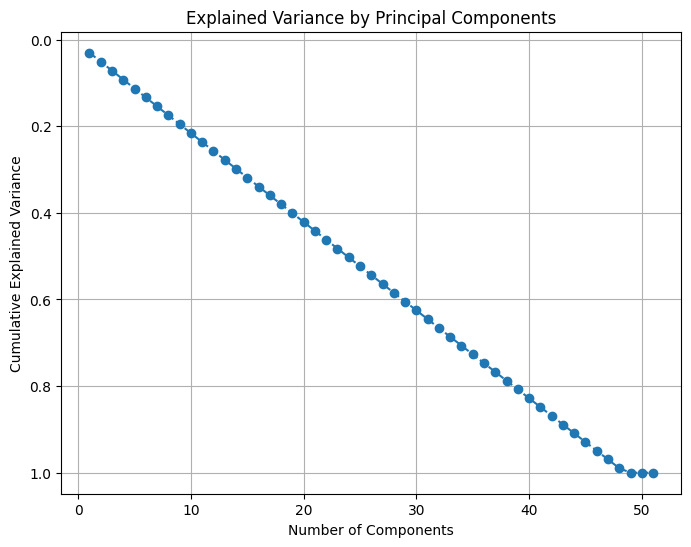

In [43]:
X = finData_df.iloc[:, :]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_nocomplimit = PCA()
pca_nocomplimit.fit(X_scaled)

explained_variance_ratio_pca = pca_nocomplimit.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio_pca.cumsum()

n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Number of PCs to capture at least 95% variance: {n_components}")
print(f"Total proportion of variance captured: {cumulative_variance_ratio[n_components-1]}")


# Plot explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_pca)+1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.gca().invert_yaxis()

plt.show()


# Similar Variance Across Components: If the variance explained by each successive component does not drop significantly,
# the plot could look more linear. This might occur if the features in the original dataset are correlated or if they share similar variances.

# High-Dimensional Data: In high-dimensional datasets where many components explain similar proportions of variance,
# the curve may appear linear for a more extended range.

# More Components Might Be Needed: If the variance does not drop sharply,
# it may imply that more components are necessary to capture significant information in the data.

In [44]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(finData_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
pcs = PCA(n_components)
pcs_fit = pcs.fit_transform(scaled_data)
print(pcs_fit)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[-1.2845578   1.1713764  -0.19384578 ...  0.21558491 -0.26811763
  -0.93315112]
 [ 0.14061407 -1.07041225  0.14632137 ... -0.40780427  2.38592765
   1.06683866]
 [-0.55693223  0.55837789 -0.84110674 ...  0.92219942  0.47433033
   2.2772402 ]
 ...
 [-1.51840864 -0.10806377  1.57114989 ... -0.88595062  0.79426752
  -0.5335502 ]
 [-0.28350206 -0.77096423  1.34352786 ...  0.97301545 -1.04793719
  -1.54301377]
 [ 0.5845988  -1.12817171  0.61981145 ...  0.67431976 -1.80690691
  -0.65112913]]


In [47]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_*100,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_*100)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC'+str(i) for i in range(1,n_components + 1)]
pcsSummary.round(4)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47
Standard deviation,1.2200,1.0067,1.0065,1.0063,1.0055,1.0052,1.0050,1.0047,1.0047,1.0042,...,0.9967,0.9961,0.9957,0.9956,0.9953,0.9948,0.9945,0.9944,0.9942,0.9937
Proportion of variance,3.0374,2.0684,2.0675,2.0666,2.0634,2.0622,2.0612,2.0600,2.0599,2.0579,...,2.0272,2.0247,2.0233,2.0229,2.0218,2.0195,2.0183,2.0180,2.0172,2.0151
Cumulative proportion,3.0374,5.1058,7.1733,9.2399,11.3033,13.3655,15.4267,17.4866,19.5465,21.6043,...,78.7601,80.7848,82.8082,84.8311,86.8529,88.8724,90.8907,92.9087,94.9259,96.9410


## Now we find that we need 47 principal components to account for more than 90% of the total variability. The first 30 principal components account for only 52% of the total variability, and thus reducing the number of variables to 30 would mean losing a lot of information.

In [48]:
# Note that the first three components account for more than 96% of the total variation associated with all 13 of the original variables.
#This suggests that we can capture most of the variability in the data with less than 25% of the number of original dimensions in the data.
#In fact, the first two principal components alone capture 92.6% of the total variation.
#However, these results are influenced by the scales of the variables, as we describe next.
pc_columns = [f'PC{i+1}' for i in range(pcs_fit.shape[1])]
pcs_df = pd.DataFrame(pcs_fit, columns=pc_columns)
pcs_df['LoanApproved'] = finData_df['LoanApproved'].values
pcs_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,LoanApproved
0,-1.284558,1.171376,-0.193846,0.605119,-0.298346,-0.538818,1.014880,1.481775,0.499478,1.938265,...,-0.901843,-0.537531,-1.292242,0.442461,-0.061824,-1.066105,0.215585,-0.268118,-0.933151,0
1,0.140614,-1.070412,0.146321,0.190322,-0.357966,-0.460915,-0.634823,0.383201,-0.355742,-1.243649,...,-0.399300,0.702127,1.492399,0.872540,1.528512,-0.650822,-0.407804,2.385928,1.066839,0
2,-0.556932,0.558378,-0.841107,-1.421532,0.512871,-0.330715,-0.358845,-0.104708,0.418412,-1.546170,...,0.662925,-0.254549,-1.633403,-1.279905,-0.130109,0.240027,0.922199,0.474330,2.277240,0
3,-1.351982,0.548342,-0.911117,1.597815,-1.058456,-0.114467,-0.011621,-0.372034,-0.309295,0.020992,...,1.097104,-0.176282,0.710760,1.348136,0.240533,1.430369,-0.422202,0.426227,1.652960,0
4,-1.434869,1.406602,-0.209715,0.533763,-1.937422,-0.699871,1.560859,-0.975564,2.563570,0.119207,...,0.720031,0.976242,0.195741,1.125013,-0.064398,-0.319049,-0.611190,0.836599,0.288449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854905,-1.126478,2.018033,-0.946957,-0.069490,1.407822,-1.163994,-1.650835,-2.668998,0.292761,-0.556235,...,-0.385251,-1.074165,2.338133,-0.116154,-0.661264,1.146636,1.413433,-0.159705,-0.454206,0
854906,-1.170247,0.675546,-0.309669,-2.107606,1.334315,0.013816,0.264571,1.229935,0.600532,-0.437817,...,0.354267,0.480748,1.308640,-1.341090,0.008508,-1.417276,0.316760,-1.183051,0.245044,0
854907,-1.518409,-0.108064,1.571150,-0.971693,1.122061,0.758034,-0.837321,1.060356,-1.030454,-0.284551,...,-0.277132,1.270201,2.097691,0.212258,-0.678670,1.016873,-0.885951,0.794268,-0.533550,0
854908,-0.283502,-0.770964,1.343528,0.826802,0.033898,1.144090,1.042964,-0.430000,0.439356,0.335591,...,-1.421607,-0.384306,-0.234407,1.086712,-1.735056,0.203379,0.973015,-1.047937,-1.543014,0


In [49]:
X_pca = pcs_df.drop(columns=['LoanApproved'])
y_pca = pcs_df['LoanApproved']
train_x_pca,test_x_pca,train_y_pca,test_y_pca= train_test_split(X_pca,y_pca,test_size=0.4, random_state=3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **PCA Logistic Regression model**

In [82]:
logit_mod = LogisticRegression()
logit_mod.fit(train_x_pca,train_y_pca)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression()

In [83]:
pred_y_pca = logit_mod.predict(test_x_pca)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
conf_matrix = confusion_matrix(test_y_pca,pred_y_pca)
Class_report = classification_report(test_y_pca,pred_y_pca)
accuracy = accuracy_score(test_y_pca,pred_y_pca)
print(f"Confustion Matrix for logit is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit is : \n\n {accuracy}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confustion Matrix for logit is: 

 [[210737   3523]
 [  2979 124725]]

Classification Report for logit is:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98    214260
           1       0.97      0.98      0.97    127704

    accuracy                           0.98    341964
   macro avg       0.98      0.98      0.98    341964
weighted avg       0.98      0.98      0.98    341964


Accuracy Score for logit is : 

 0.9809863026517411



# **K-fold cross-validation For Logistic**

In [66]:
cv_scores = cross_val_score(logit_mod, X_pca, y_pca, cv=5)
cv_scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.98067048, 0.98123779, 0.981191  , 0.98045993, 0.9813957 ])

# **PCA Naive Bayes Mode**

In [85]:
Naive_pca = GaussianNB()
Naive_pca.fit(train_x_pca,train_y_pca)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GaussianNB()

In [86]:
pred_y_naive = Naive_pca.predict(test_x_pca)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
conf_matrix = confusion_matrix(test_y_pca,pred_y_naive)
Class_report = classification_report(test_y_pca,pred_y_naive)
accuracy = accuracy_score(test_y_pca,pred_y_naive)
print(f"Confustion Matrix for Naive Bayes Mode is: \n\n {conf_matrix}\n")
print(f"Classification Report for Naive Bayes Mode is:\n\n {Class_report}\n")
print(f"Accuracy Score for Naive Bayes Mode is : \n\n {accuracy}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confustion Matrix for Naive Bayes Mode is: 

 [[205650   8610]
 [   302 127402]]

Classification Report for Naive Bayes Mode is:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98    214260
           1       0.94      1.00      0.97    127704

    accuracy                           0.97    341964
   macro avg       0.97      0.98      0.97    341964
weighted avg       0.98      0.97      0.97    341964


Accuracy Score for Naive Bayes Mode is : 

 0.9739387771812238



# **K-fold cross-validation For Naive Baye's Model**

In [88]:
cv_scores = cross_val_score(Naive_pca, X_pca, y_pca, cv=3)
cv_scores

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0.97336211, 0.97403235, 0.97375513])

# **PCA Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pca_svm_model = LinearSVC()
pca_svm_model.fit(train_x_pca, train_y_pca)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearSVC()

In [ ]:
pred_y_pca_svm = pca_svm_model.predict(test_x_pca)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
conf_matrix = confusion_matrix(test_y_pca,pred_y_pca_svm)
Class_report = classification_report(test_y_pca,pred_y_pca_svm)
accuracy = accuracy_score(test_y_pca,pred_y_pca_svm)
print(f"Confustion Matrix for logit is: \n\n {conf_matrix}\n")
print(f"Classification Report for logit is:\n\n {Class_report}\n")
print(f"Accuracy Score for logit is : \n\n {accuracy}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Confustion Matrix for logit is: 

 [[210701   3559]
 [  2863 124841]]

Classification Report for logit is:

               precision    recall  f1-score   support

           0       0.99      0.98      0.98    214260
           1       0.97      0.98      0.97    127704

    accuracy                           0.98    341964
   macro avg       0.98      0.98      0.98    341964
weighted avg       0.98      0.98      0.98    341964


Accuracy Score for logit is : 

 0.9812202454059492



## **PCA Data Visualization Techniques**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


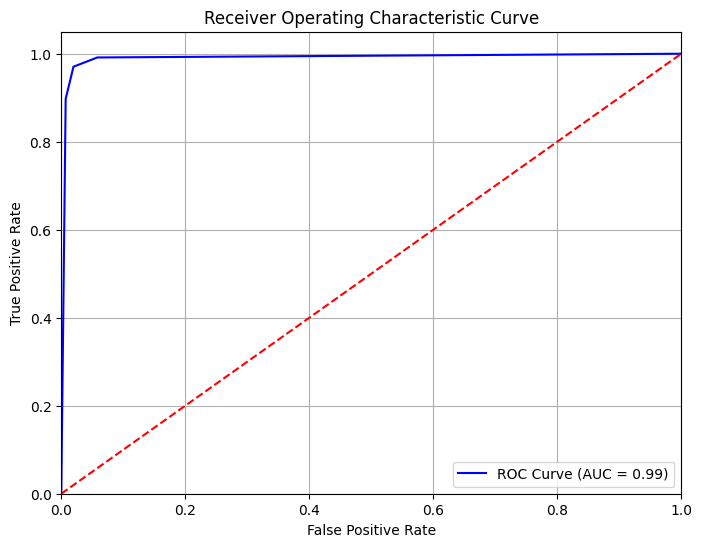

In [ ]:
# ROC Curve for Classification

y_prob_class_acc = rand_mod.predict_proba(test_x_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(test_y_pca, y_prob_class_acc)
roc_auc = roc_auc_score(test_y_pca, y_prob_class_acc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()